In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [2]:
ff1.Cache.enable_cache('cache')

In [3]:
session = ff1.get_session(2023, 7, 2)
session.name

'Practice 2'

In [4]:
session.event

RoundNumber                                                 7
Country                                                 Spain
Location                                            Barcelona
OfficialEventName    FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023
EventDate                                 2023-06-04 17:00:00
EventName                                  Spanish Grand Prix
EventFormat                                      conventional
Session1                                           Practice 1
Session1Date                              2023-06-02 13:30:00
Session2                                           Practice 2
Session2Date                              2023-06-02 17:00:00
Session3                                           Practice 3
Session3Date                              2023-06-03 12:30:00
Session4                                           Qualifying
Session4Date                              2023-06-03 16:00:00
Session5                                                 Race
Session5

In [5]:
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v2.2.9]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            IN

In [6]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6CD3BF,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,F91536,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293D1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
27,27,N HULKENBERG,HUL,Haas F1 Team,B6BABD,Nico,Hulkenberg,Nico Hulkenberg,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,C92D4B,Guanyu,Zhou,Guanyu Zhou,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
23,23,A ALBON,ALB,Williams,37BEDD,Alexander,Albon,Alexander Albon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,5E8FAA,Yuki,Tsunoda,Yuki Tsunoda,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
21,21,N DE VRIES,DEV,AlphaTauri,5E8FAA,Nyck,De Vries,Nyck De Vries,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [7]:
fastest_lap = session.laps.pick_fastest()
fastest_lap['LapTime']

Timedelta('0 days 00:01:13.907000')

In [8]:
fastest_lap['Driver']

'VER'

In [9]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'RUS' 'SAI' 'HAM' 'OCO' 'HUL' 'ZHO' 'ALB' 'TSU' 'DEV' 'MAG' 'STR'
 'LEC' 'ALO' 'PER' 'GAS' 'NOR' 'SAR' 'BOT' 'PIA']


In [10]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [11]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [12]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:13.907000        0 days 00:00:00
1     ALO 0 days 00:01:14.077000 0 days 00:00:00.170000
2     HUL 0 days 00:01:14.177000 0 days 00:00:00.270000
3     PER 0 days 00:01:14.219000 0 days 00:00:00.312000
4     OCO 0 days 00:01:14.242000 0 days 00:00:00.335000
5     LEC 0 days 00:01:14.246000 0 days 00:00:00.339000
6     SAI 0 days 00:01:14.274000 0 days 00:00:00.367000
7     RUS 0 days 00:01:14.392000 0 days 00:00:00.485000
8     BOT 0 days 00:01:14.448000 0 days 00:00:00.541000
9     GAS 0 days 00:01:14.457000 0 days 00:00:00.550000
10    HAM 0 days 00:01:14.549000 0 days 00:00:00.642000
11    PIA 0 days 00:01:14.583000 0 days 00:00:00.676000
12    ZHO 0 days 00:01:14.585000 0 days 00:00:00.678000
13    NOR 0 days 00:01:14.694000 0 days 00:00:00.787000
14    MAG 0 days 00:01:14.713000 0 days 00:00:00.806000
15    DEV 0 days 00:01:14.785000 0 days 00:00:00.878000
16    TSU 0 days 00:01:14.840000 0 days 00:00:00

In [13]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

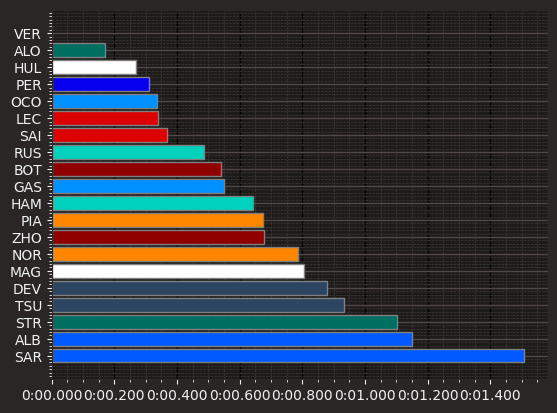

In [14]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

In [15]:
laps = session.load_laps(with_telemetry=True)

# Get lap times for a specific driver
driver = 'HAM'
hamilton = laps.pick_driver(driver)

# Print lap times
print(hamilton['LapTime'])

/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v2.2.9]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core      

97                       NaT
98    0 days 00:01:29.281000
99    0 days 00:01:17.245000
100   0 days 00:02:06.956000
101   0 days 00:01:30.540000
102   0 days 00:01:54.007000
103   0 days 00:01:16.204000
104   0 days 00:01:53.457000
105   0 days 00:01:16.010000
106   0 days 00:01:29.702000
107                      NaT
108   0 days 00:01:14.549000
109   0 days 00:02:23.796000
110   0 days 00:02:09.123000
111   0 days 00:01:15.124000
112   0 days 00:01:30.437000
113                      NaT
114   0 days 00:01:20.602000
115   0 days 00:01:20.403000
116   0 days 00:01:20.172000
117   0 days 00:01:20.431000
118   0 days 00:01:23.749000
119   0 days 00:01:24.961000
120   0 days 00:01:40.087000
121   0 days 00:01:20.715000
122   0 days 00:01:20.136000
123   0 days 00:01:24.322000
124   0 days 00:01:19.948000
125   0 days 00:01:20.199000
126   0 days 00:02:00.105000
127   0 days 00:02:01.751000
Name: LapTime, dtype: timedelta64[ns]


In [16]:
Alonso = laps.pick_driver('ALO')
Max = laps.pick_driver('VER')
max_lap_times = Max['LapTime']
Perez = laps.pick_driver('PER')
perez_lap_times = Perez['LapTime']
charles = laps.pick_driver('LEC')
charles_lap_times = charles['LapTime']

In [17]:
print(hamilton['LapTime'])

97                       NaT
98    0 days 00:01:29.281000
99    0 days 00:01:17.245000
100   0 days 00:02:06.956000
101   0 days 00:01:30.540000
102   0 days 00:01:54.007000
103   0 days 00:01:16.204000
104   0 days 00:01:53.457000
105   0 days 00:01:16.010000
106   0 days 00:01:29.702000
107                      NaT
108   0 days 00:01:14.549000
109   0 days 00:02:23.796000
110   0 days 00:02:09.123000
111   0 days 00:01:15.124000
112   0 days 00:01:30.437000
113                      NaT
114   0 days 00:01:20.602000
115   0 days 00:01:20.403000
116   0 days 00:01:20.172000
117   0 days 00:01:20.431000
118   0 days 00:01:23.749000
119   0 days 00:01:24.961000
120   0 days 00:01:40.087000
121   0 days 00:01:20.715000
122   0 days 00:01:20.136000
123   0 days 00:01:24.322000
124   0 days 00:01:19.948000
125   0 days 00:01:20.199000
126   0 days 00:02:00.105000
127   0 days 00:02:01.751000
Name: LapTime, dtype: timedelta64[ns]


In [18]:
russell = laps.pick_driver('RUS')
russell_lap_times = russell['LapTime']
print(russell['LapTime'])

34                      NaT
35   0 days 00:01:17.731000
36   0 days 00:01:37.211000
37   0 days 00:01:23.906000
38   0 days 00:01:44.813000
39   0 days 00:01:31.935000
40   0 days 00:01:35.337000
41   0 days 00:01:49.736000
42   0 days 00:01:15.771000
43   0 days 00:01:39.344000
44                      NaT
45   0 days 00:01:14.392000
46   0 days 00:01:39.819000
47                      NaT
48   0 days 00:01:20.711000
49   0 days 00:01:20.515000
50   0 days 00:01:20.314000
51   0 days 00:01:20.074000
52   0 days 00:01:20.657000
53   0 days 00:01:20.559000
54   0 days 00:01:19.998000
55   0 days 00:01:20.525000
56   0 days 00:01:20.383000
57   0 days 00:01:20.407000
58   0 days 00:01:20.446000
59   0 days 00:01:22.965000
60   0 days 00:01:20.678000
61   0 days 00:01:21.063000
62   0 days 00:01:21.141000
63   0 days 00:01:56.651000
64   0 days 00:01:58.771000
Name: LapTime, dtype: timedelta64[ns]


In [23]:
print(Alonso['LapTime'])
print(russell['LapTime'])

0                       NaT
1    0 days 00:01:30.146000
2                       NaT
3    0 days 00:01:29.603000
4                       NaT
5    0 days 00:01:29.380000
6    0 days 00:01:44.143000
7                       NaT
8    0 days 00:01:28.255000
9                       NaT
10   0 days 00:02:15.569000
11   0 days 00:01:27.930000
12   0 days 00:01:50.491000
13                      NaT
14   0 days 00:01:32.492000
15   0 days 00:01:32.543000
16   0 days 00:01:32.647000
17                      NaT
18                      NaT
19   0 days 00:01:31.947000
20   0 days 00:01:31.984000
21   0 days 00:01:58.177000
22   0 days 00:02:13.194000
Name: LapTime, dtype: timedelta64[ns]
23                      NaT
24   0 days 00:01:51.329000
25   0 days 00:01:30.642000
26   0 days 00:01:59.699000
27   0 days 00:01:30.068000
28   0 days 00:02:04.090000
29   0 days 00:01:40.713000
30                      NaT
31   0 days 00:01:38.884000
32   0 days 00:01:29.501000
33   0 days 00:02:15.682000
34   0 day

In [24]:
print(Perez['LapTime'])

333                      NaT
334   0 days 00:01:30.751000
335   0 days 00:02:28.177000
336   0 days 00:01:29.694000
337   0 days 00:02:23.627000
338   0 days 00:01:29.622000
339   0 days 00:02:23.594000
340   0 days 00:01:39.505000
341                      NaT
342   0 days 00:01:29.174000
343   0 days 00:02:06.673000
344   0 days 00:02:18.956000
345   0 days 00:01:28.419000
346   0 days 00:01:45.783000
347                      NaT
348   0 days 00:01:32.183000
349   0 days 00:01:37.447000
350   0 days 00:01:37.090000
351                      NaT
352                      NaT
353   0 days 00:01:33.865000
354   0 days 00:01:32.213000
355   0 days 00:02:02.177000
356                      NaT
Name: LapTime, dtype: timedelta64[ns]


In [25]:
print(charles['LapTime'])

288                      NaT
289   0 days 00:01:31.459000
290   0 days 00:02:25.023000
291   0 days 00:01:29.497000
292   0 days 00:02:26.160000
293   0 days 00:01:29.779000
294   0 days 00:02:08.256000
295                      NaT
296   0 days 00:01:29.418000
297   0 days 00:02:22.305000
298   0 days 00:01:28.398000
299   0 days 00:02:18.740000
300   0 days 00:02:19.697000
301   0 days 00:01:41.234000
302   0 days 00:01:33.725000
303                      NaT
304   0 days 00:01:34.337000
305   0 days 00:01:33.512000
306   0 days 00:01:33.537000
307                      NaT
Name: LapTime, dtype: timedelta64[ns]


In [26]:
print(Max['LapTime'])

0                       NaT
1    0 days 00:01:30.146000
2                       NaT
3    0 days 00:01:29.603000
4                       NaT
5    0 days 00:01:29.380000
6    0 days 00:01:44.143000
7                       NaT
8    0 days 00:01:28.255000
9                       NaT
10   0 days 00:02:15.569000
11   0 days 00:01:27.930000
12   0 days 00:01:50.491000
13                      NaT
14   0 days 00:01:32.492000
15   0 days 00:01:32.543000
16   0 days 00:01:32.647000
17                      NaT
18                      NaT
19   0 days 00:01:31.947000
20   0 days 00:01:31.984000
21   0 days 00:01:58.177000
22   0 days 00:02:13.194000
Name: LapTime, dtype: timedelta64[ns]


In [29]:
laps = session.load_laps(with_telemetry=True)

# Get lap times for a specific driver
driver = 'PER'
hamilton = laps.pick_driver(driver)

# Print lap times
print(hamilton['LapTime'])

# Export dataframe to csv file
hamilton.to_csv('perez.csv', index=False)

/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Practice 3 [v2.2.9]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core   

337   0 days 00:01:31.006000
338   0 days 00:01:35.209000
339   0 days 00:01:58.087000
340   0 days 00:01:20.252000
341                      NaT
342   0 days 00:01:51.419000
343   0 days 00:01:56.354000
344   0 days 00:01:43.684000
345   0 days 00:01:35.780000
346   0 days 00:01:19.062000
347                      NaT
348   0 days 00:01:35.029000
349   0 days 00:01:23.572000
350   0 days 00:01:53.183000
351   0 days 00:01:18.123000
352   0 days 00:01:48.827000
353   0 days 00:02:10.300000
Name: LapTime, dtype: timedelta64[ns]


In [27]:
print(drivers)

['VER' 'RUS' 'SAI' 'HAM' 'OCO' 'HUL' 'ZHO' 'ALB' 'TSU' 'DEV' 'MAG' 'STR'
 'LEC' 'ALO' 'PER' 'GAS' 'NOR' 'SAR' 'BOT' 'PIA']


In [21]:
Alonso = laps.pick_driver('ALO')
alonso_lap_times = Alonso['LapTime']
Max = laps.pick_driver('VER')
max_lap_times = Max['LapTime']
Perez = laps.pick_driver('PER')
perez_lap_times = Perez['LapTime']
charles = laps.pick_driver('LEC')
charles_lap_times = charles['LapTime']
hamilton = laps.pick_driver('HAM')
hamilton_lap_times = Max['LapTime']
russell = laps.pick_driver('RUS')
russell_lap_times = russell['LapTime']
sainz = laps.pick_driver('SAI')
sainz_lap_times = sainz['LapTime']
ocon = laps.pick_driver('OCO')
ocon_lap_times = ocon['LapTime']
norris = laps.pick_driver('NOR')
norris_lap_times = norris['LapTime']

In [25]:
df4 = pd.DataFrame({'ALO': alonso_lap_times, 'VER': max_lap_times, 'PER': perez_lap_times, 'LEC': charles_lap_times,
                    'HAM': hamilton_lap_times, 'RUS': russell_lap_times, 'SAI': sainz_lap_times,
                    'OCO': ocon_lap_times, 'NOR': norris_lap_times})
df4.to_csv('drivers.csv', index=False) # save the dataframe as a csv file with heading

In [26]:
# Read csv file into a dataframe
df = pd.read_csv("drivers.csv")

In [27]:
df.head(45)

,ALO,VER,PER,LEC,HAM,RUS,SAI,OCO,NOR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0 days 00:01:15.655000,NaN,NaN,0 days 00:01:15.655000,NaN,NaN,NaN,NaN
2,NaN,0 days 00:02:05.478000,NaN,NaN,0 days 00:02:05.478000,NaN,NaN,NaN,NaN
3,NaN,0 days 00:01:15.718000,NaN,NaN,0 days 00:01:15.718000,NaN,NaN,NaN,NaN
4,NaN,0 days 00:01:28.200000,NaN,NaN,0 days 00:01:28.200000,NaN,NaN,NaN,NaN
5,NaN,0 days 00:02:15.249000,NaN,NaN,0 days 00:02:15.249000,NaN,NaN,NaN,NaN
6,NaN,0 days 00:01:14.968000,NaN,NaN,0 days 00:01:14.968000,NaN,NaN,NaN,NaN
7,NaN,0 days 00:01:47.059000,NaN,NaN,0 days 00:01:47.059000,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0 days 00:01:13.907000,NaN,NaN,0 days 00:01:13.907000,NaN,NaN,NaN,NaN


In [35]:
# Store only single column in a new dataframe using iloc method
alonso = df.iloc[:, 0]
verstappen = df.iloc[:, 1]
checo = df.iloc[:, 2]
charles = df.iloc[:, 3]
lewis = df.iloc[:, 4]
russell = df.iloc[:, 5]
sainz = df.iloc[:, 6]
ocon = df.iloc[:, 7]
lando = df.iloc[:, 8]

In [40]:
print(Alonso['LapTime'])


100                      NaT
101   0 days 00:01:35.567000
102   0 days 00:01:35.140000
103   0 days 00:01:36.664000
104   0 days 00:01:34.920000
105   0 days 00:01:34.658000
106   0 days 00:01:34.422000
107   0 days 00:01:34.398000
108   0 days 00:01:34.400000
109   0 days 00:01:34.835000
110   0 days 00:01:34.982000
111   0 days 00:01:34.927000
112   0 days 00:01:34.918000
113   0 days 00:01:34.837000
114   0 days 00:01:34.717000
115   0 days 00:01:34.842000
116   0 days 00:01:34.595000
117   0 days 00:02:09.623000
118                      NaT
119                      NaT
120   0 days 00:01:36.033000
121   0 days 00:01:34.738000
122   0 days 00:01:34.771000
123   0 days 00:01:34.836000
124   0 days 00:01:34.136000
125   0 days 00:01:34.119000
126   0 days 00:01:34.246000
127   0 days 00:01:34.062000
128   0 days 00:01:33.988000
129   0 days 00:01:33.654000
130   0 days 00:01:33.605000
131   0 days 00:01:33.401000
132   0 days 00:01:33.337000
133   0 days 00:01:33.220000
134   0 days 0

In [41]:
print(russell['LapTime'])

150                      NaT
151   0 days 00:01:36.114000
152   0 days 00:01:35.300000
153   0 days 00:01:35.596000
154   0 days 00:01:35.423000
155   0 days 00:01:35.477000
156   0 days 00:01:35.256000
157   0 days 00:01:35.157000
158   0 days 00:01:35.890000
159   0 days 00:01:35.265000
160   0 days 00:01:35.400000
161   0 days 00:01:35.283000
162   0 days 00:01:35.043000
163   0 days 00:01:34.940000
164   0 days 00:01:34.946000
165   0 days 00:01:35.120000
166   0 days 00:01:34.892000
167   0 days 00:02:12.217000
168                      NaT
169                      NaT
170   0 days 00:01:36.802000
171   0 days 00:01:35.070000
172   0 days 00:01:34.958000
173   0 days 00:01:35.063000
174   0 days 00:01:34.106000
175   0 days 00:01:34.493000
176   0 days 00:01:34.118000
177   0 days 00:01:34.091000
178   0 days 00:01:33.688000
179   0 days 00:01:34.165000
180   0 days 00:01:33.433000
181   0 days 00:01:33.633000
182   0 days 00:01:33.520000
183   0 days 00:01:33.758000
184   0 days 0

In [44]:
print(Max['LapTime'])

50                      NaT
51   0 days 00:01:37.680000
52   0 days 00:01:36.526000
53   0 days 00:01:36.503000
54   0 days 00:01:35.359000
55   0 days 00:01:35.840000
56   0 days 00:01:35.687000
57   0 days 00:01:35.129000
58   0 days 00:01:35.561000
59   0 days 00:01:35.443000
60   0 days 00:01:35.306000
61   0 days 00:01:34.848000
62   0 days 00:01:35.183000
63   0 days 00:01:34.200000
64   0 days 00:01:34.499000
65   0 days 00:01:34.443000
66   0 days 00:01:33.790000
67   0 days 00:02:14.348000
68                      NaT
69                      NaT
70   0 days 00:01:36.946000
71   0 days 00:01:34.973000
72   0 days 00:01:34.115000
73   0 days 00:01:34.146000
74   0 days 00:01:32.933000
75   0 days 00:01:32.940000
76   0 days 00:01:32.838000
77   0 days 00:01:32.869000
78   0 days 00:01:32.670000
79   0 days 00:01:32.877000
80   0 days 00:01:32.382000
81   0 days 00:01:32.400000
82   0 days 00:01:32.387000
83   0 days 00:01:32.341000
84   0 days 00:01:32.249000
85   0 days 00:01:32

In [45]:
print(Perez['LapTime'])

0                       NaT
1    0 days 00:01:35.906000
2    0 days 00:01:34.829000
3    0 days 00:01:35.651000
4    0 days 00:01:34.873000
5    0 days 00:01:34.621000
6    0 days 00:01:34.277000
7    0 days 00:01:34.477000
8    0 days 00:01:34.255000
9    0 days 00:01:34.106000
10   0 days 00:01:34.075000
11   0 days 00:01:34.160000
12   0 days 00:01:34.263000
13   0 days 00:01:34.409000
14   0 days 00:01:34.392000
15   0 days 00:01:34.190000
16   0 days 00:01:33.961000
17   0 days 00:02:07.357000
18                      NaT
19                      NaT
20   0 days 00:01:34.557000
21   0 days 00:01:33.895000
22   0 days 00:01:33.464000
23   0 days 00:01:33.440000
24   0 days 00:01:33.426000
25   0 days 00:01:33.072000
26   0 days 00:01:32.891000
27   0 days 00:01:33.025000
28   0 days 00:01:32.726000
29                      NaT
30   0 days 00:01:32.554000
31   0 days 00:01:32.498000
32   0 days 00:01:32.550000
33   0 days 00:01:32.294000
34   0 days 00:01:32.680000
35   0 days 00:01:32